In [4]:
import pandas as pd
import numpy as np

In [5]:
features = pd.read_excel("temps.xlsx")
features.head()

,year,month,day,week,temp_2,temp_1,average,actual
0,2016,1,1,Fri,45,45,45.6,45
1,2016,1,2,Sat,44,45,45.7,44
2,2016,1,3,Sun,45,44,45.8,41
3,2016,1,4,Mon,44,41,45.9,40
4,2016,1,5,Tues,41,40,46.0,44


In [6]:
features.describe()

,year,month,day,temp_2,temp_1,average,actual
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000


In [7]:
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)
features.head()

,year,month,day,temp_2,temp_1,average,actual,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,True,False,False,False,False,False,False
1,2016,1,2,44,45,45.7,44,False,False,True,False,False,False,False
2,2016,1,3,45,44,45.8,41,False,False,False,True,False,False,False
3,2016,1,4,44,41,45.9,40,False,True,False,False,False,False,False
4,2016,1,5,41,40,46.0,44,False,False,False,False,False,True,False


In [8]:
import numpy as np
# Labels are the values we want to predict
labels = np.array(features['actual'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('actual', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [9]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

## Treino com a média

In [10]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('average')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  5.06


## Bibiliotecas

In [11]:
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn import metrics

## Treino com RandomForestRegressor

In [12]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [13]:
# Use the forest's predict method on the test data
predictions_rf = rf.predict(test_features)

# Calculate the absolute errors
errors_rf = abs(predictions_rf - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_rf), 2), 'degrees.')

r_sq = rf.score(features, labels)
print('Coeficiente de Determinação (R²):', r_sq)

print('MAE:', metrics.mean_absolute_error(test_labels, predictions_rf))
print('MSE:', metrics.mean_squared_error(test_labels, predictions_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, predictions_rf)))

Mean Absolute Error: 3.93 degrees.
Coeficiente de Determinação (R²): 0.932094797587982
MAE: 3.932057471264368
MSE: 26.68358100000001
RMSE: 5.165615258611505


## Treino com AdaBoostRegressor

In [14]:
ada = AdaBoostRegressor(n_estimators=100)
ada.fit(train_features, train_labels)
ada_pred = ada.predict(test_features)


In [15]:

# Calculate the absolute errors
errors_ada = abs(ada_pred - test_labels)

# Print out the mean absolute error (mae)

print('MAE:', metrics.mean_absolute_error(test_labels, ada_pred))
print('MSE:', metrics.mean_squared_error(test_labels, ada_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, ada_pred)))

MAE: 3.625198275124569
MSE: 23.016459191515025
RMSE: 4.797547205762026


## Treino com GradientBoostingRegressor

In [16]:
grb = GradientBoostingRegressor(n_estimators=100)
grb.fit(train_features, train_labels)
gbr_pred = grb.predict(test_features)

In [17]:
# Calculate the absolute errors
errors_gbr = abs(gbr_pred - test_labels)

# Print out the mean absolute error (mae)

print('MAE:', metrics.mean_absolute_error(test_labels, gbr_pred))
print('MSE:', metrics.mean_squared_error(test_labels, gbr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, gbr_pred)))

MAE: 4.090351814551153
MSE: 28.669308510635503
RMSE: 5.354372840084588


## Visualização de árvores - Random Forest

In [18]:
rf = RandomForestRegressor(max_depth=3)
rf.fit(train_features, train_labels)

tree = rf.estimators_[5]

tree

DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=899143377)

DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=899143377)

In [19]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

In [20]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

##Visualização de árvores - Ada Boost

In [21]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree_ada.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree_ada.dot')

# Write graph to a png file
graph.write_png('tree_ada.png')

## Feature importance - Random Forest

In [22]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.71
Variable: average              Importance: 0.26
Variable: temp_2               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: day                  Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


Feature importance - Ada Boost

In [23]:
# Get numerical feature importances
importances = list(ada.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.51
Variable: average              Importance: 0.25
Variable: temp_2               Importance: 0.1
Variable: month                Importance: 0.06
Variable: day                  Importance: 0.04
Variable: week_Mon             Importance: 0.04
Variable: week_Fri             Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


Feature importance - Gradient Boost

In [24]:
# Get numerical feature importances
importances = list(grb.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.63
Variable: average              Importance: 0.3
Variable: day                  Importance: 0.02
Variable: month                Importance: 0.01
Variable: temp_2               Importance: 0.01
Variable: week_Fri             Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


## Visualização Real x Predito - Random Forest

ValueError: rotation must be 'vertical', 'horizontal' or a number, not 60

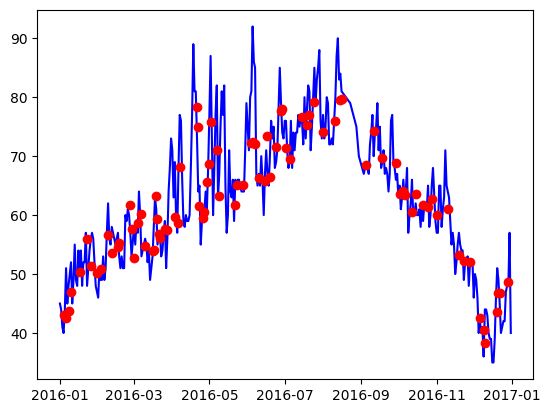

In [25]:
import datetime
import matplotlib.pyplot as plt
# Dates of training values
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
# Dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions_rf})
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60');
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');

## Visualização Real x Predito - Ada Boost

In [ ]:
import datetime
import matplotlib.pyplot as plt
# Dates of training values
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
# Dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': ada_pred})
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60');
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');

## Visualização Real x Predito - Gradient Boost

In [ ]:
import datetime
import matplotlib.pyplot as plt
# Dates of training values
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
# Dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': gbr_pred})
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60');
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');

## Gradient Descent

In [ ]:
from time import time
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error


reg_ridge = LinearRegression()
for size in [10**i for i in range(3,6)]:
    prob=make_regression(n_samples=size,n_features=800, n_informative=545,noise=1.0,random_state=101)
    X,y=prob
    y=y.reshape(size,1)
    print("Size of the problem: ",X.shape)
    t1 = time()
    reg_ridge.fit(X,y)
    t2 = time()
    t_delta=round(1e3*(t2-t1),3)
    print(f"Took {t_delta} milliseconds")
    rmse = mean_squared_error(y,reg_ridge.predict(X), squared=True)
    print("RMSE:", rmse)
    print()